## 02 - Exploratory Data Analysis (EDA)

En este análisis exploratorio de datos (EDA), se investigará la evolución de las fuentes de energía a lo largo del tiempo para identificar si han mantenido una generación estable o han experimentado incrementos o reducciones. 

Se analizarán las tendencias de generación por fuente energética y se evaluarán posibles patrones en los datos. El objetivo es entender cómo las diferentes fuentes han impactado la generación de energía a lo largo de los años.

Algunos de los pasos que seguiremos son:

- Graficar las series de tiempo individualmente para ver su evolución

- Realizar un análisis de correlaciones para ver si algunas han reemplazado a otras durnate el paos del tiempo

- Ver si hay series estacionales y ver como se mueve esta estacionalidad

- Analizar el procentaje de generación total que representa cada serie durante el tiempo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 Comenzaremos cargando y graficando nuestro dataframe:

In [6]:
df = pd.read_csv("../data/cleandf.csv", index_col="DATE", parse_dates=True)
df.head()

Coal  Geothermal  Hydroelectric Conventional  Natural Gas  \
DATE                                                                           
2001-01-01  709148444.0   4917300.0                  75408194.0  169554652.0   
2001-02-01  598941934.0   4292176.0                  69891562.0  151867704.0   
2001-03-01  621076042.0   4760092.0                  81908758.0  177457656.0   
2001-04-01  562682612.0   4379964.0                  72051976.0  183370982.0   
2001-05-01  606371658.0   4285520.0                  76702540.0  203736820.0   

                Nuclear      Other  Other Biomass  Other Gases   Petroleum  \
DATE                                                                         
2001-01-01  274828308.0  3966680.0      4834584.0    2873768.0  72447372.0   
2001-02-01  245089628.0  3487797.0      4385324.0    2702636.0  41366012.0   
2001-03-01  248562848.0  3724622.0      4756158.0    3076724.0  46932022.0   
2001-04-01  224012104.0  3829824.0      4748957.0    2791372.0  43453506.0   
2001-05-01  246049780.0  3945070.0      4842966.0    3138220.0  41559958.0   

            Solar Thermal and Photovoltaic       Wind  \
DATE                                                    
2001-01-01                         26000.0  1557000.0   
2001-02-01                         50272.0  1724968.0   
2001-03-01                        125992.0  2128480.0   
2001-04-01                        155036.0  2738782.0   
2001-05-01                        324212.0  2540116.0   

            Wood and Wood Derived Fuels  
DATE                                     
2001-01-01                   12764848.0  
2001-02-01                   10788604.0  
2001-03-01                   11410160.0  
2001-04-01                   11284028.0  
2001-05-01                   10959732.0

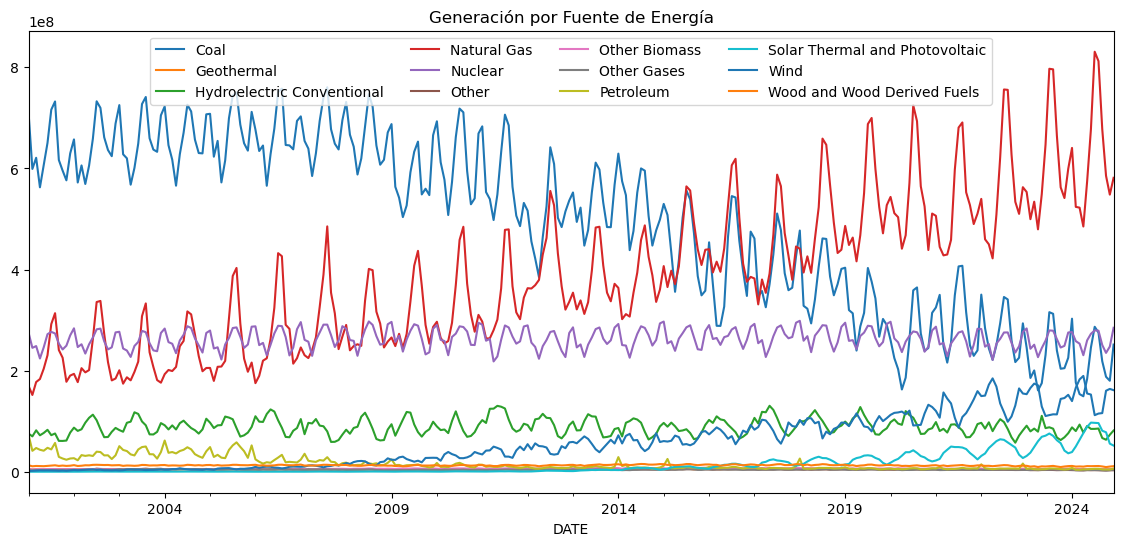

In [49]:
df.plot(figsize=(14,6), title="Generación por Fuente de Energía")
plt.legend(loc = "best", ncols = 4)
plt.show()

Vamos a ver la media móvil para tener una visión mas clara de las tendencias:

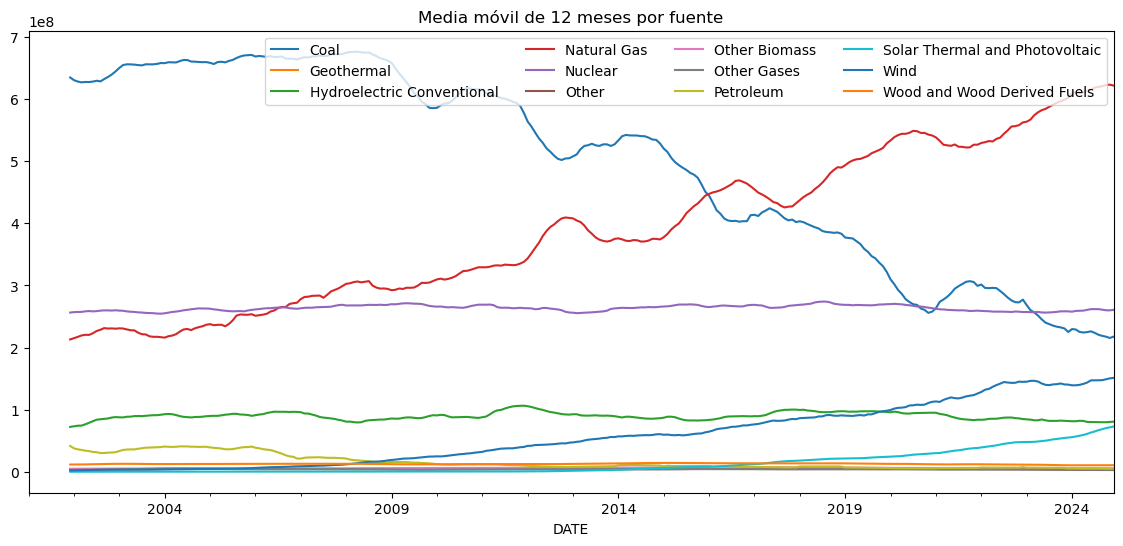

In [50]:
df_rolling = df.rolling(window=12).mean()
df_rolling.plot(figsize=(14,6), title="Media móvil de 12 meses por fuente")
plt.legend(loc = "best", ncols = 4)
plt.show()

Se puede observar como algunas series son estacionales y  otras tienen tendencia y estacionalidad.

Las graficaremos individualmente para verlo más claro:

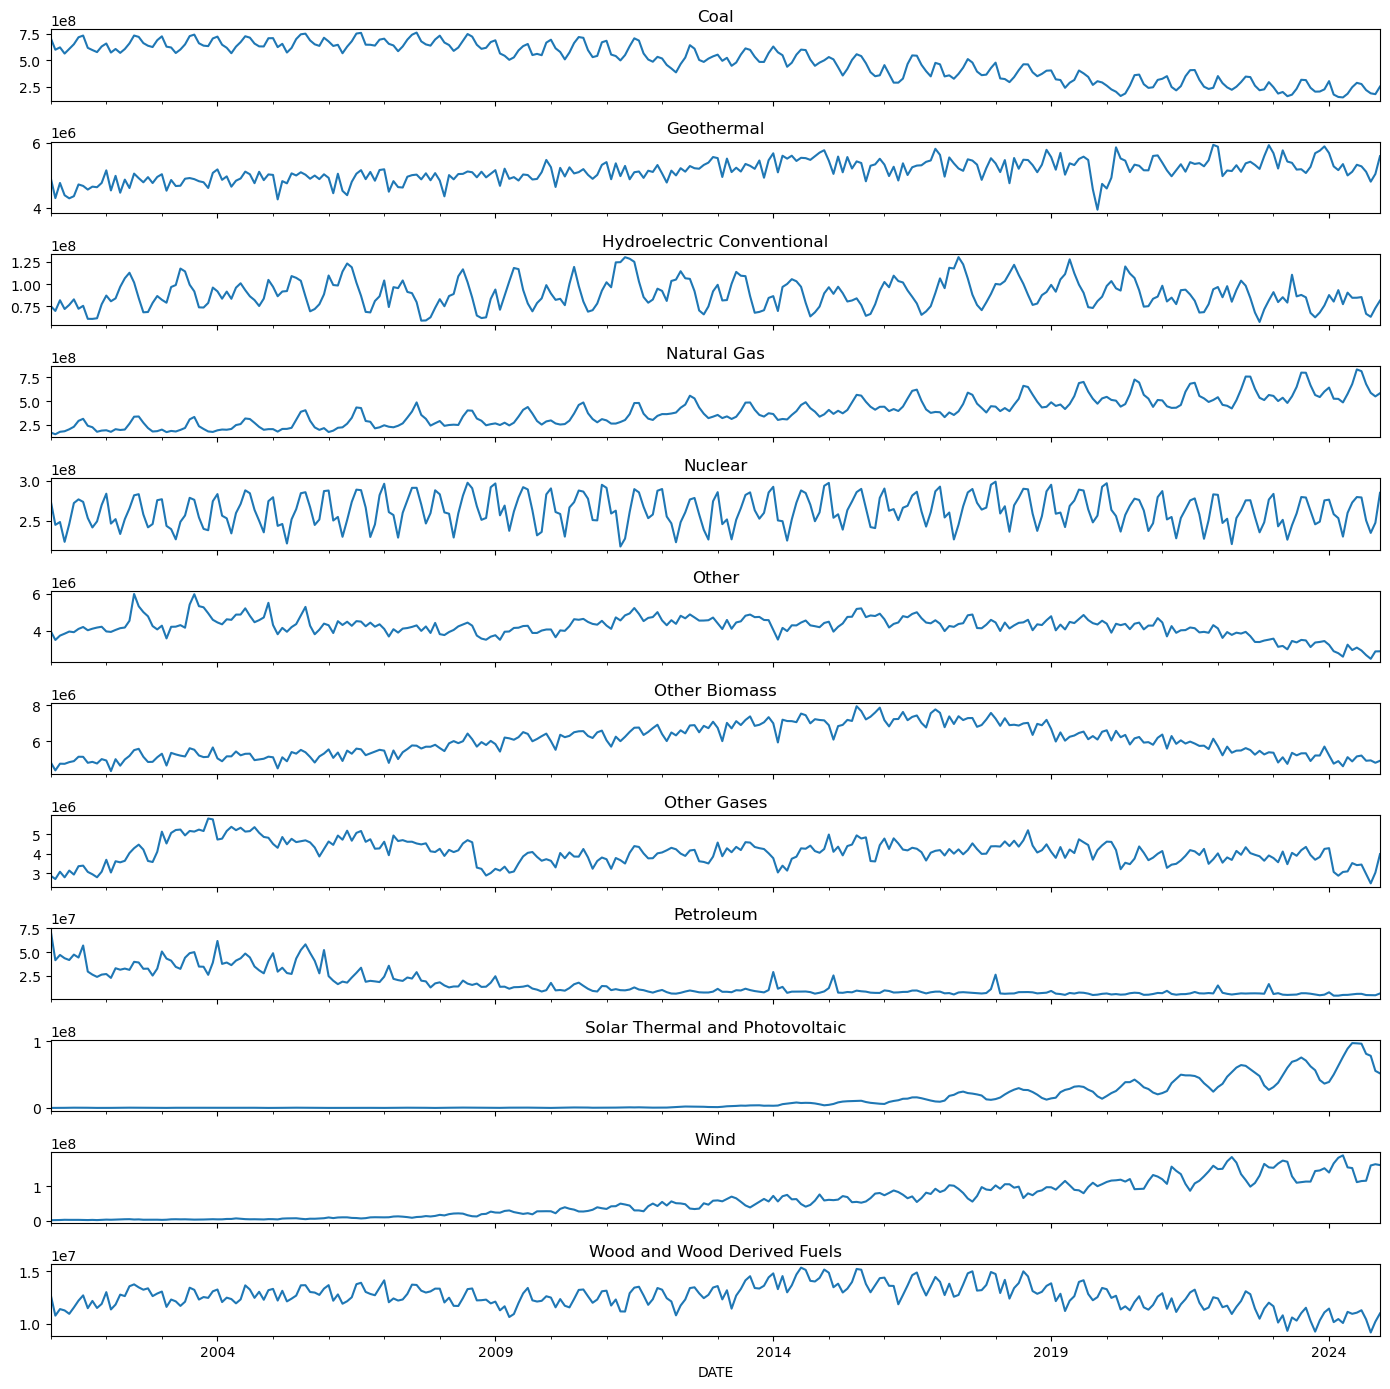

In [29]:
nrows = df.shape[1]

fig, ax = plt.subplots(nrows, 1, figsize=(14,14), sharex = True)

for i, col in enumerate(df.columns):
    df[col].plot(ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

**Observaciones**

- La generación de carbón y petróleo han tenido una tendencia negativa

- La generación solar/fotovoltaica lleva incrementandoa  alto ritmo desde 2013, el viento desde 2008

- La generación hidroelétrica y nuclear tienen estacionalidad y se han matenido estables

- El gas natural tiene tendencia positiva y estacionalidad



---

### **Análisis de correlaciones**

Ahora crearemos la matriz de correlación para ver relaciones entre las diferentes fuenets de energia: 

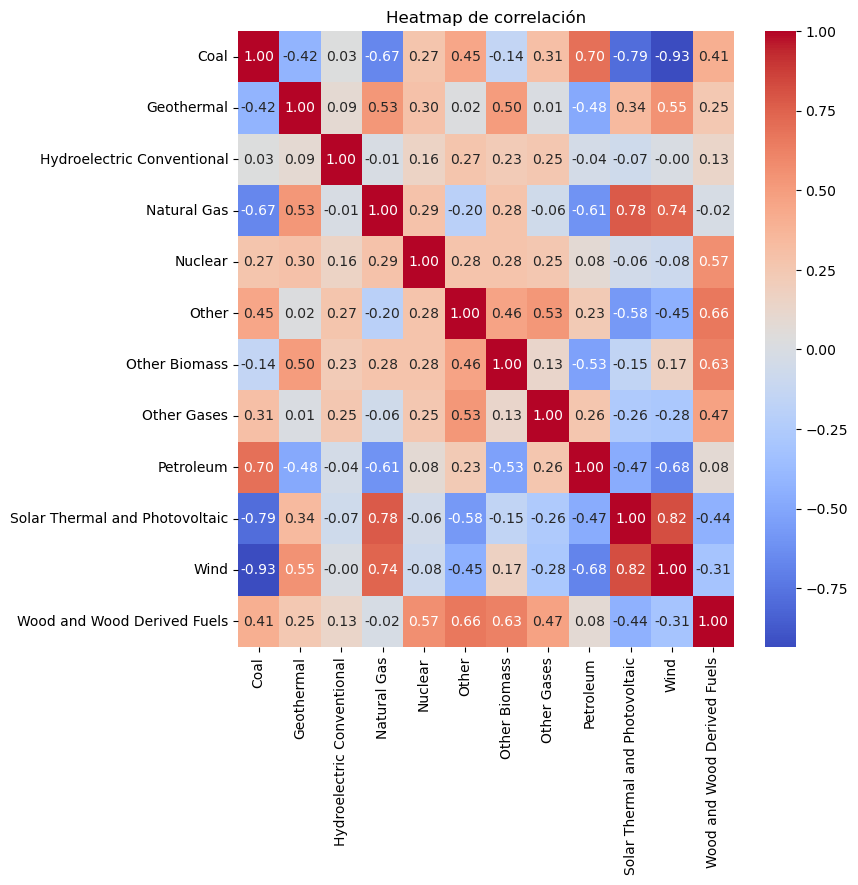

In [38]:
cor = df.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(cor, cmap="coolwarm", fmt = ".2f", annot=True)
plt.title("Heatmap de correlación")
plt.show()

In [39]:
import numpy as np

# Obtener las correlaciones en una lista ordenada (sin duplicados ni la diagonal)
cor_pairs = (
    cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))  # Solo parte superior
    .stack()
    .sort_values(ascending=False)
)

print(cor_pairs.head(10))
print(cor_pairs.tail(10))

Solar Thermal and Photovoltaic  Wind                              0.819454
Natural Gas                     Solar Thermal and Photovoltaic    0.780739
                                Wind                              0.736624
Coal                            Petroleum                         0.695369
Other                           Wood and Wood Derived Fuels       0.660548
Other Biomass                   Wood and Wood Derived Fuels       0.625848
Nuclear                         Wood and Wood Derived Fuels       0.565315
Geothermal                      Wind                              0.550346
Other                           Other Gases                       0.530724
Geothermal                      Natural Gas                       0.529432
dtype: float64
Other          Wind                             -0.448208
Petroleum      Solar Thermal and Photovoltaic   -0.473062
Geothermal     Petroleum                        -0.481925
Other Biomass  Petroleum                        -0.527667
Oth

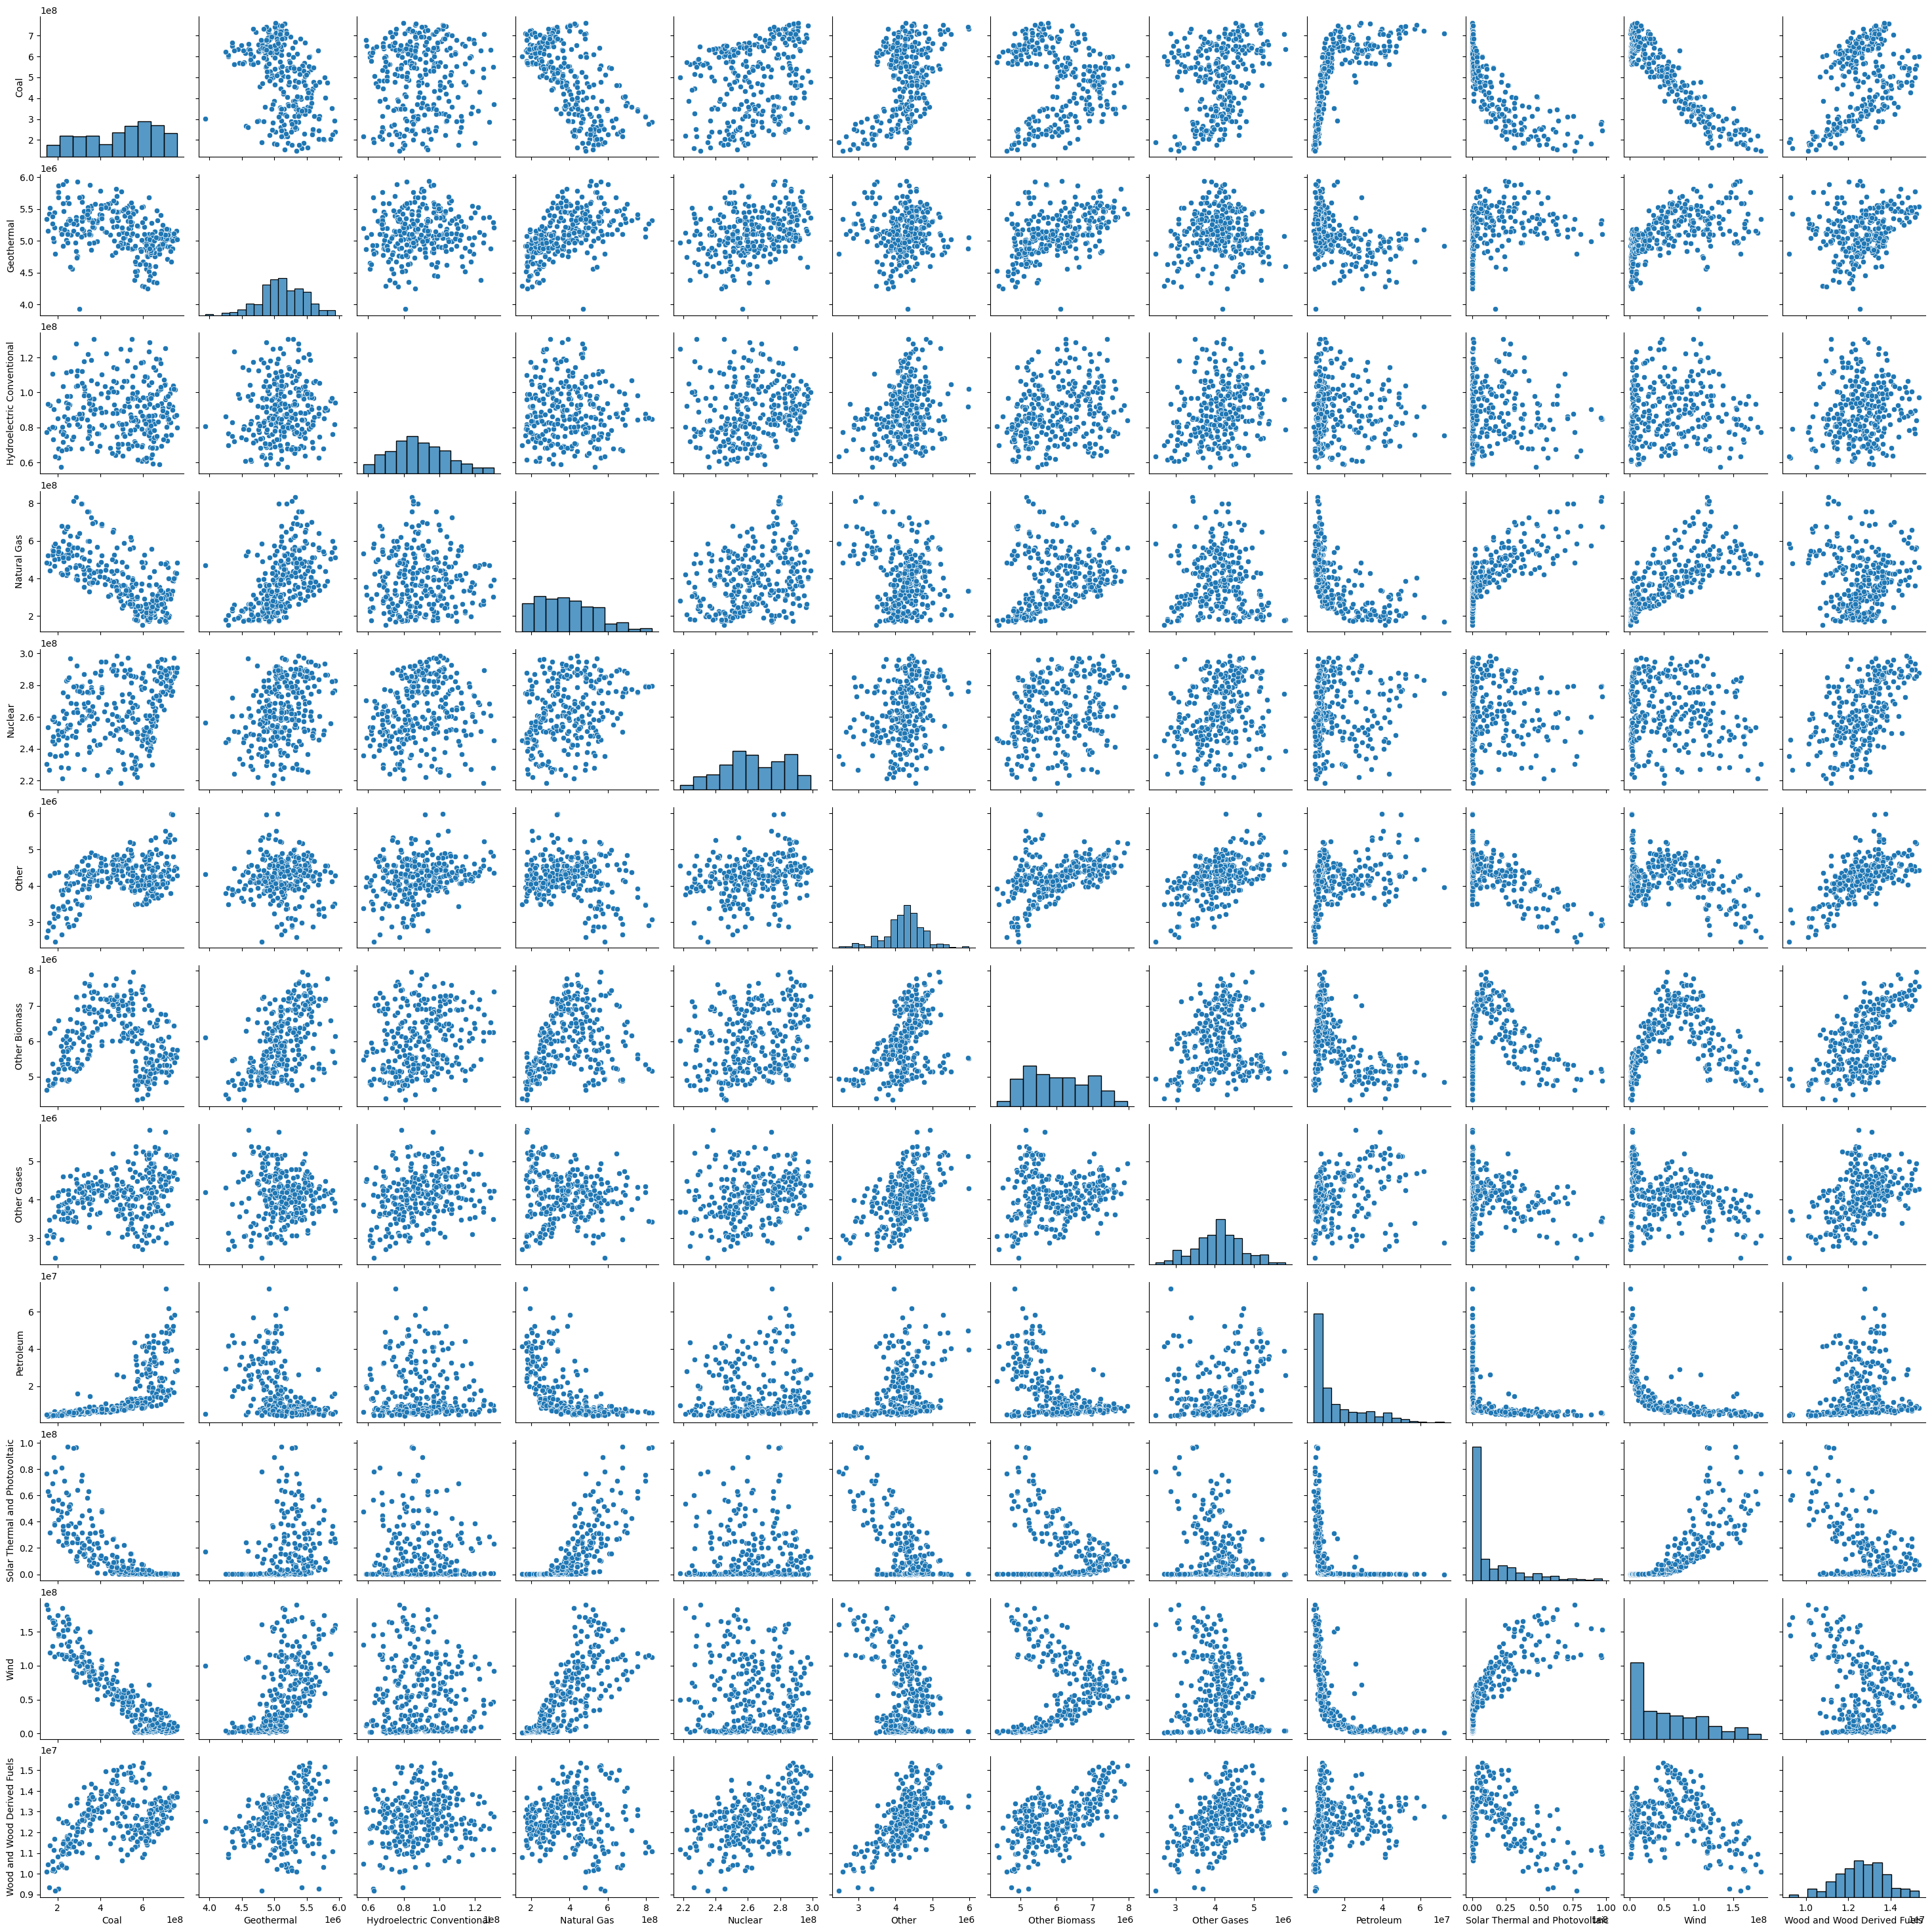

In [41]:
sns.pairplot(df)

**Observaciones:**


- Correlaciones Positivas (se mueven juntas)

    - **Solar, Wind (0.819) y Gas Natural (0.781 )** tienden a aumentar o disminuir juntas → indican un patrón de crecimiento conjunto de energías más limpias.  
    - **Fuentes como Madera, Biomasa y Nuclear** también muestran cierta asociación positiva entre sí, quizás por su uso estable o complementario en ciertas regiones.

- Correlaciones Negativas (se mueven en direcciones opuestas)

    - **Carbón vs. Solar (-0.789) y Wind (-0.935)** → cuando aumenta el uso de renovables, baja el uso del carbón (y viceversa), lo que sugiere una transición energética.  
    - **Petróleo** tiende a estar inversamente relacionado con otras fuentes, mostrando que su uso baja cuando otras fuentes crecen.

**Resumen final**

Hay una transición clara hacia energías renovables, especialmente solar y eólica, en detrimento del carbón y petróleo, lo que refleja un posible cambio estructural en la generación energética.


----

### **Análisis estacional**

Ahora solo nos enfocaremos en las series estacionales y con niveles de generación constantes a lo largo del tiempo.

Utilziaremos el método STL:

In [68]:
from statsmodels.tsa.seasonal import STL

def grafico_estacional(df, col, seasonal=False):
    df_c = df.copy()

    df_c["año"] = df_c.index.year
    df_c["mes"] = df_c.index.month

    if seasonal:
        df_stl = STL(df_c[col], seasonal = 13).fit()
        col += '_seas' 
        df_c[col] = df_stl.seasonal.to_frame(col)

    df_pivot = df_c.pivot(index = 'mes', columns = 'año', values = col)

    ax = df_pivot.plot(figsize = (12,4))
    plt.title(f"Gráfico estacional de {col}")
    plt.xlabel("Mes")
    plt.ylabel("MWh")

    plt.legend(title="Año", loc = "best", ncols = 9)

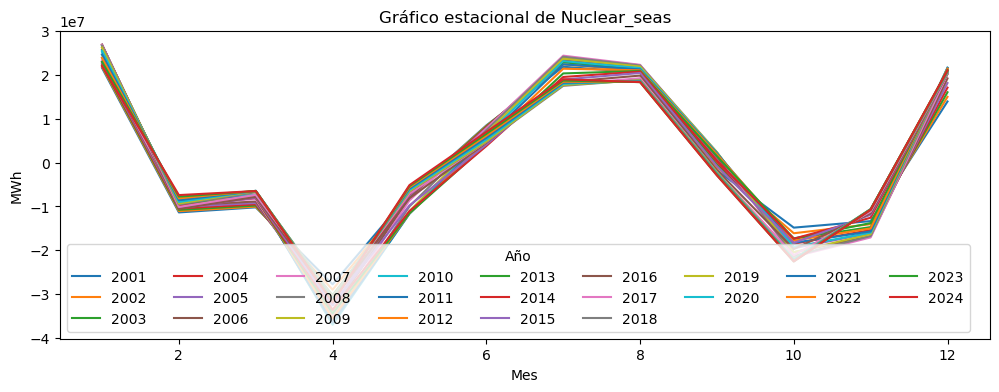

In [79]:
grafico_estacional(df, 'Nuclear', seasonal = True)

**Observaciones:**

Los meses de más demanda son julio y agosto y el de menor en abril

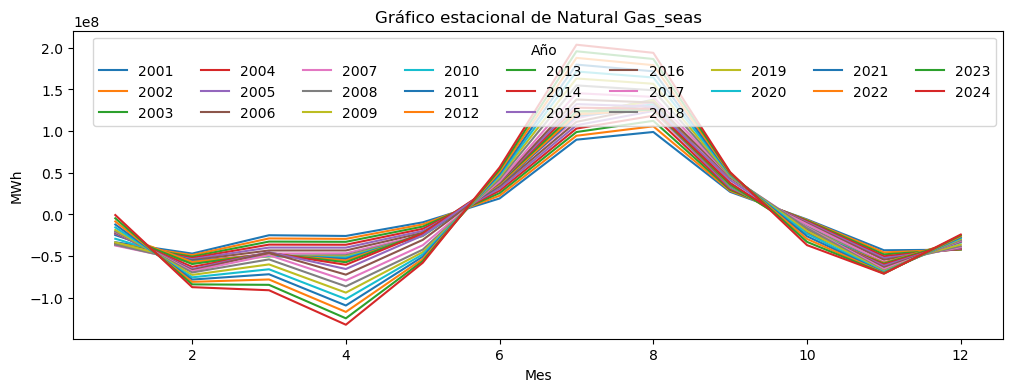

In [82]:
grafico_estacional(df, 'Natural Gas', seasonal = True)

**Observaciones:**

Los meses de más demanda son julio y agosto y el de menor en abril

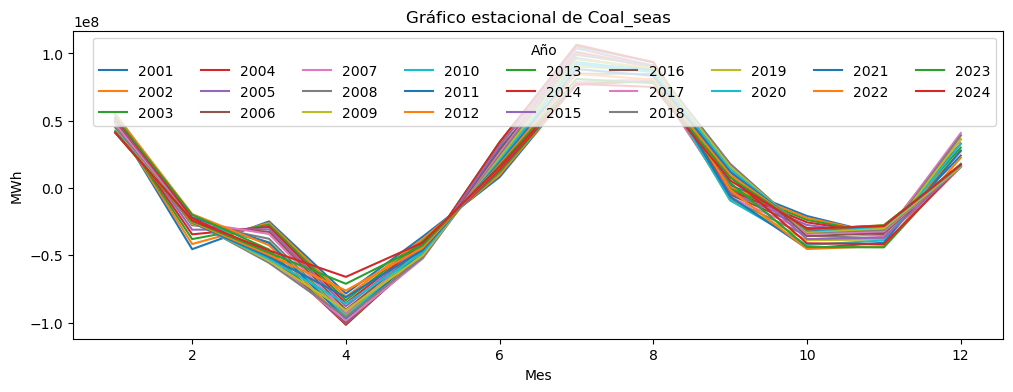

In [85]:
grafico_estacional(df, 'Coal', seasonal = True)

**Observaciones:**

Los meses de más demanda son julio y agosto y el de menor en abril

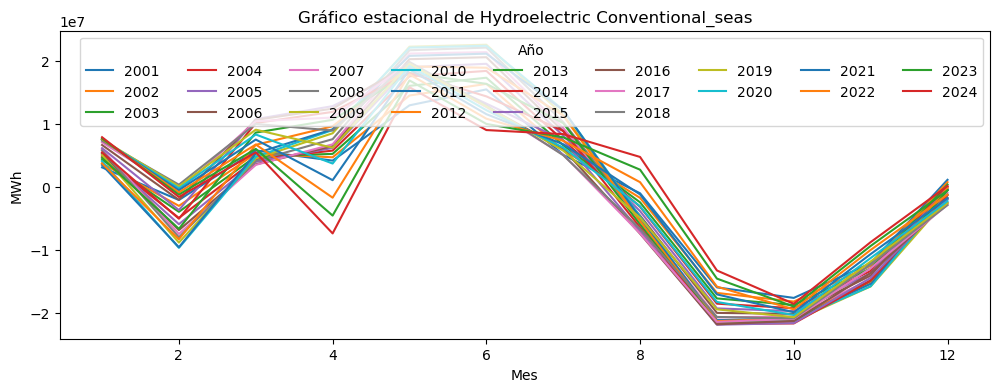

In [71]:
grafico_estacional(df, 'Hydroelectric Conventional', seasonal = True)

**Observaciones:**

Los meses de más demanda son mayo y junio, los de menor septiembre y octubre

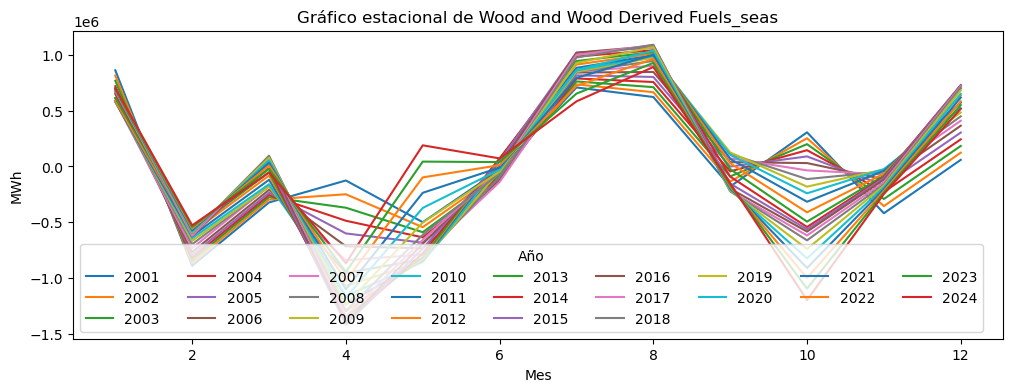

In [87]:
grafico_estacional(df, 'Wood and Wood Derived Fuels', seasonal = True)

**Observaciones:**

Para la madera y sus derivados no se ve un patrón muy claro

---

### **Total de generación por fuente**

Aquí veremos el ranking de las fuentes que más generaron al inicio en 2001, al final en 2024, y en la acumulación total

<Axes: title={'center': 'Total de generación por fuente'}>

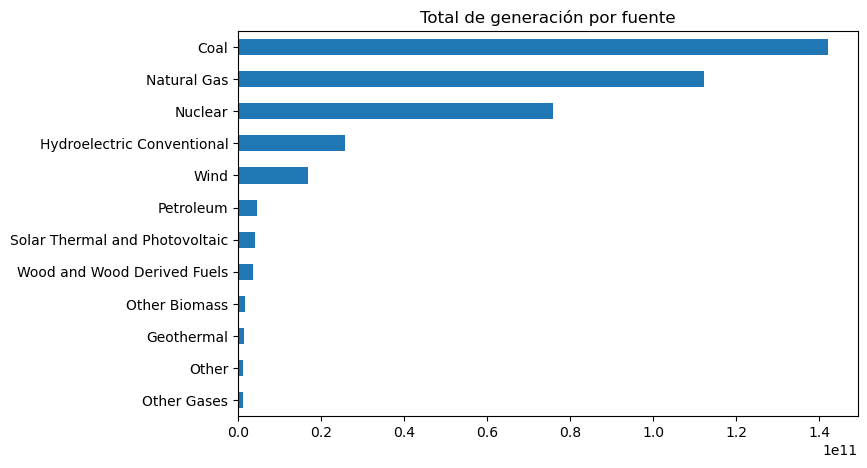

In [88]:
df.sum().sort_values().plot(kind="barh", figsize=(8,5), title="Total de generación por fuente")

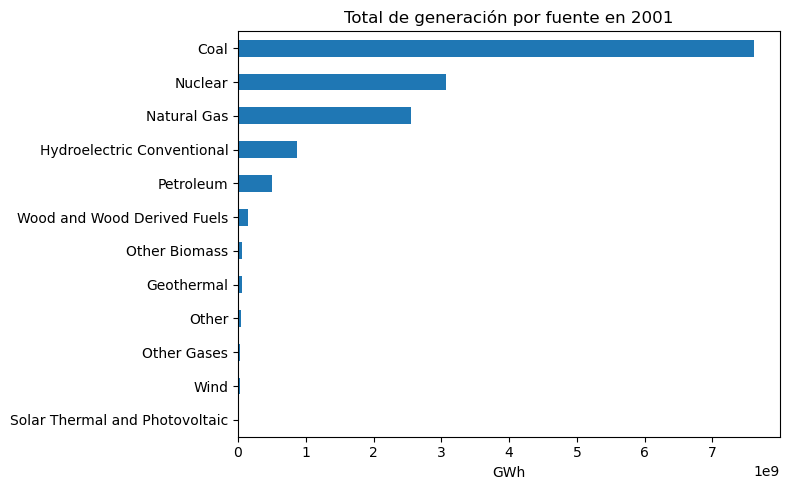

In [89]:
df_2001 = df[df.index.year == 2001]
df_2001.sum().sort_values().plot(kind="barh", figsize=(8,5), title="Total de generación por fuente en 2001")
plt.xlabel("GWh")
plt.tight_layout()
plt.show()

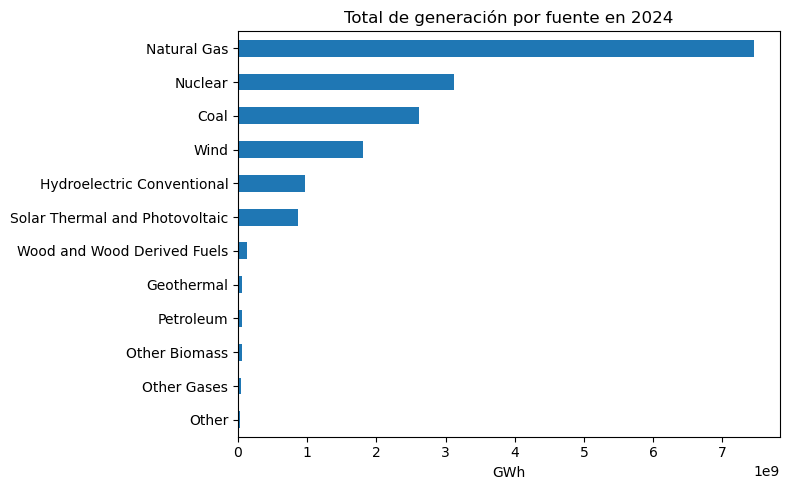

In [90]:
df_2024 = df[df.index.year == 2024]
df_2024.sum().sort_values().plot(kind="barh", figsize=(8,5), title="Total de generación por fuente en 2024")
plt.xlabel("GWh")
plt.tight_layout()
plt.show()

**Observaciones:**

- El carbón fue la fuente de mayor generación en 2001 con más del doble de difererncia de la segunda, además ha sido la que más ha producido en totla, auqnue en 2024 ha pasado a ser la 3a fuente

- El gas natural ha pasado del 2o puetso en 2001 al 1o en 2024 con más del doble de diferencia del segundo

- La generación nuclear siempre ha sido relevante y aun se mantiene

- El viento y la hidroeléctrica pasarond e ser irrelevanets  ser muy importantes en 2024 y en generación total acumulada

---

### **Porcentaje de participación en la generación**

Aquí veremos como las fuentes han tendido a incrementar o reducir su porcentaje de participación en la generación, utilizando la tendencia extraida de STL:

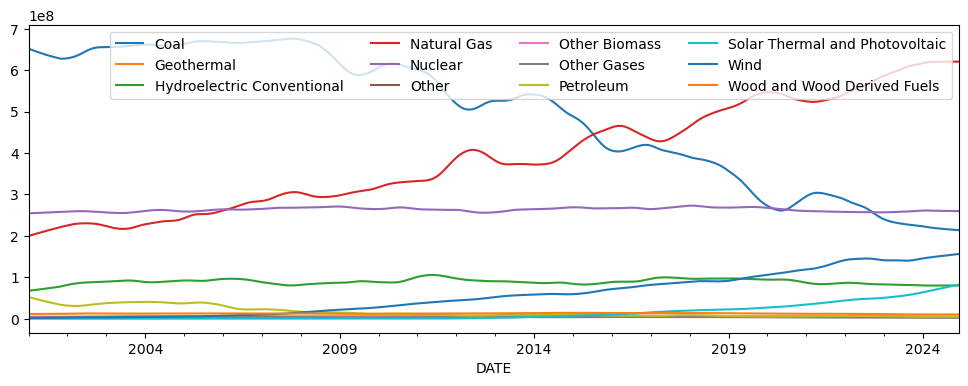

In [95]:
trends = pd.DataFrame(index = df.index)

for col in df.columns:
    stl = STL(df[col], seasonal = 13).fit()

    trends[col] = stl.trend

trends.plot(figsize = (12,4))
plt.legend(loc='best', ncols=4)
plt.show()

Text(0, 0.5, 'Porcentaje de aportación')

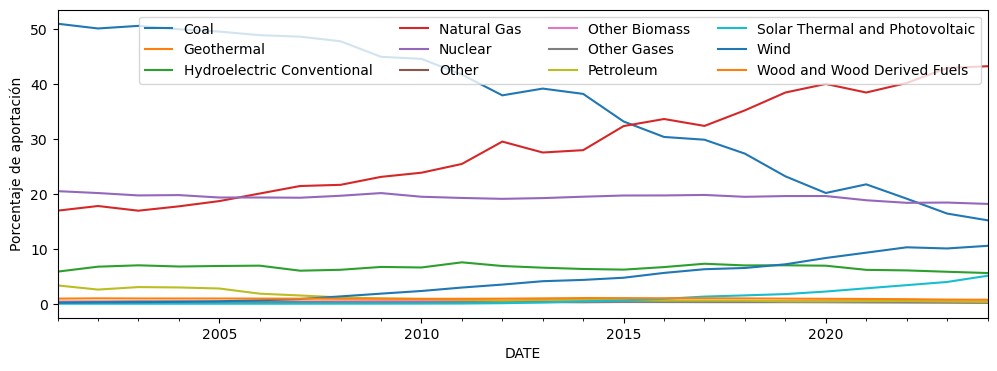

In [98]:
trends_y = trends.resample('YE').sum()

tot_anuales = trends_y.sum(axis=1)
trends_pct = 100*trends_y.div(tot_anuales, axis=0)

ax=trends_pct.plot(figsize=(12,4))
ax.legend(loc='best', ncols=4)
ax.set_ylabel("Porcentaje de aportación")

Nos podemos atmbién enfocar en algunas variables para analziarlas mejor:

Text(0, 0.5, 'Porcentaje de aportación')

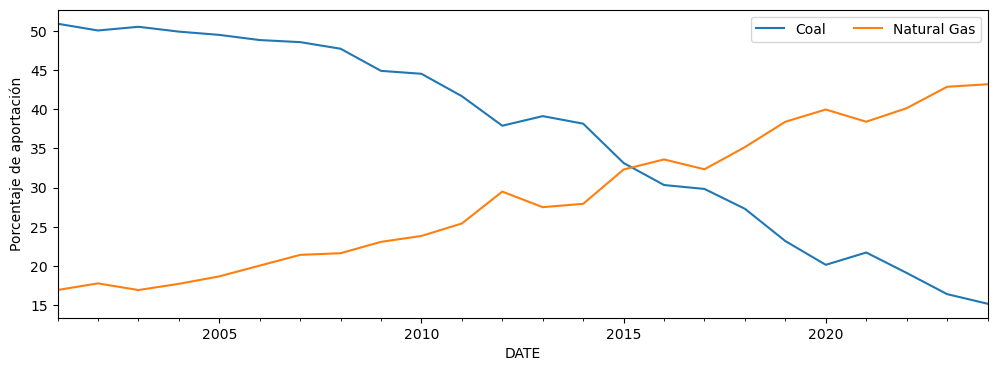

In [99]:
# Coal y Natural Gas

cols = ["Coal", "Natural Gas"]

ax=trends_pct[cols].plot(figsize=(12,4))
ax.legend(loc='best', ncols=4)
ax.set_ylabel("Porcentaje de aportación")

**Observaciones:**

Text(0, 0.5, 'Porcentaje de aportación')

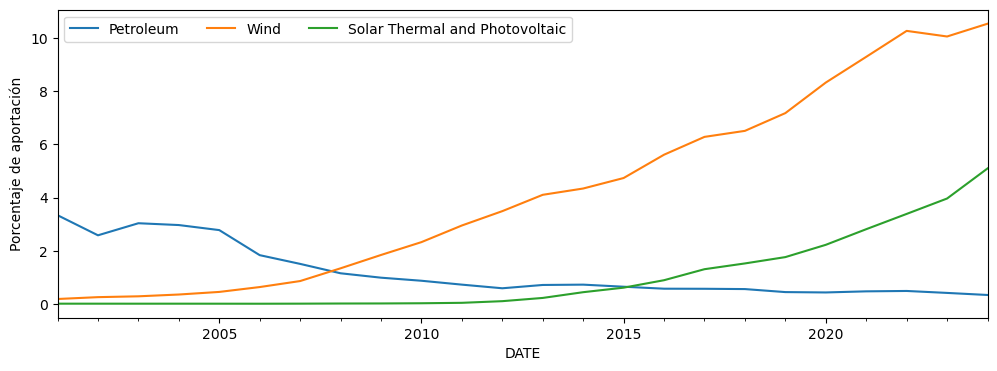

In [101]:
# Coal y Natural Gas

cols = ["Petroleum", "Wind", "Solar Thermal and Photovoltaic"]

ax=trends_pct[cols].plot(figsize=(12,4))
ax.legend(loc='best', ncols=4)
ax.set_ylabel("Porcentaje de aportación")

----

### **Tendencia general**

Hemos visto como aumenta o disminuye cada fuente individualmente, ahora veremos atmbién si la producción general va en alza, es estable o disminuye

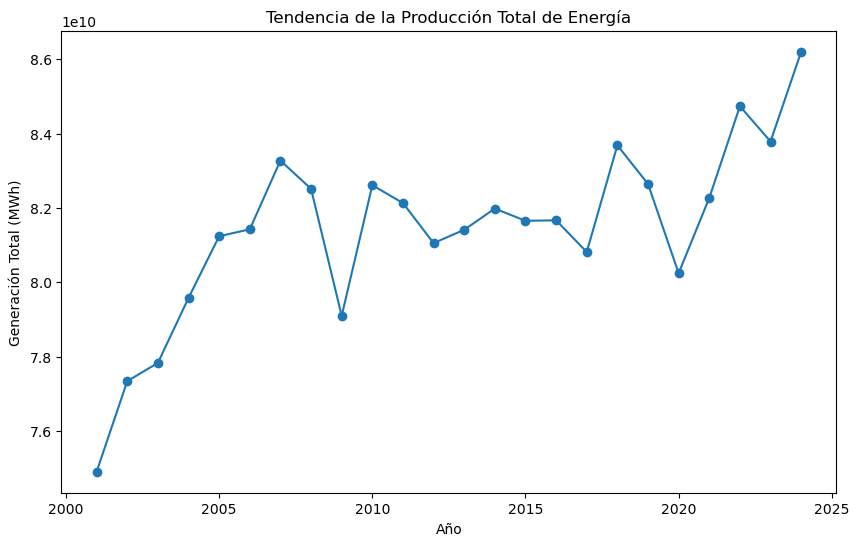

In [109]:
df['total_generacion'] = df.sum(axis=1)

# Para ver el total por año (si el índice es datetime)
df['año'] = df.index.year
df_total = df.groupby('año')['total_generacion'].sum()

plt.figure(figsize=(10, 6))
plt.plot(df_total.index, df_total.values, marker='o', label="Total Generación")
plt.title("Tendencia de la Producción Total de Energía")
plt.xlabel("Año")
plt.ylabel("Generación Total (MWh)")
plt.show()

**Observaciones:**

La producción total de energía ha mostrado una tendencia general al alza, con un crecimiento constante en los últimos años. Sin embargo, se observan caídas significativas en los años 2008 y 2020. Estas caídas podrían estar relacionadas con eventos globales que afectaron la economía y la demanda energética:

- 2008: La caída podría estar vinculada con la crisis económica global de 2008, que redujo la actividad industrial y, por ende, la demanda de energía.

- 2020: La caída en 2020 probablemente esté asociada con la pandemia de COVID-19, que provocó una disminución en la actividad económica mundial debido a los confinamientos, el cierre de negocios y la reducción de la movilidad.

Estas caídas reflejan cómo factores externos, como crisis económicas y pandemias, pueden tener un impacto significativo en la generación y demanda de energía.

## **Conclusiones Finales**

A lo largo del análisis de las fuentes de generación de energía en el tiempo, hemos identificado varias tendencias clave que reflejan la dinámica del sector energético. Los resultados más destacados son:

1. **Relaciones entre fuentes de energía:**
El análisis de correlación revela que las fuentes de energía solar y eólica están fuertemente asociadas con el aumento en el uso de gas natural, mientras que se observa una reducción en la utilización de carbón. Esto sugiere una transición gradual hacia fuentes de energía más limpias y sostenibles.

2. **Estabilidad vs. Tendencias claras:**
Algunas fuentes, como la energía nuclear, mantienen una tendencia estable a lo largo del tiempo. En cambio, otras fuentes muestran movimientos más marcados, con un aumento en la generación de energía eólica y solar, y una disminución progresiva en el uso de carbón y petróleo, reflejando un cambio en la preferencia por energías más sostenibles.

3. **Aumento de la producción general:**
Podemos ver como la tendencia de la producción general es positiva, a pesar de algunas caídas debido a factores externos

### **Transición hacia energías renovables:**
En general, los resultados muestran una transición clara hacia fuentes de energía renovables, con un fuerte crecimiento de las energías más limpias como la solar y la eólica. Esto se contrapone al declive rápido de fuentes más contaminantes y menos sostenibles, como el carbón y el petróleo.